Importing packages needed for this project.

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import h5py
from PIL import Image
from h5data import load_dataset
from dnn import dnn
import os
from path import my_path

In [2]:
my_path = my_path
data_folder = "Datasets"
path = os.path.join(my_path, data_folder)
train_X_orig, train_y, test_X_orig, test_y , classes = load_dataset(path, 'train_catvnoncat.h5', 'test_catvnoncat.h5')

Explore the dataset

In [3]:
print(train_X_orig[1])
print(train_y)
print(classes)

[[[196 192 190]
  [193 186 182]
  [188 179 174]
  ...
  [ 90 142 200]
  [ 90 142 201]
  [ 90 142 201]]

 [[230 229 229]
  [204 199 197]
  [193 186 181]
  ...
  [ 91 143 201]
  [ 91 143 201]
  [ 91 143 201]]

 [[232 225 224]
  [235 234 234]
  [208 205 202]
  ...
  [ 91 144 202]
  [ 91 144 202]
  [ 92 144 202]]

 ...

 [[ 18  17  15]
  [ 14  14  13]
  [ 29  29  32]
  ...
  [ 83  81  81]
  [ 84  82  83]
  [ 82  81  82]]

 [[ 22  20  18]
  [ 16  15  14]
  [ 25  24  24]
  ...
  [ 82  80  80]
  [ 83  81  82]
  [ 82  81  81]]

 [[ 45  43  39]
  [ 61  59  54]
  [ 81  78  74]
  ...
  [ 83  82  81]
  [ 84  82  82]
  [ 82  80  81]]]
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1


It shows that there are 209 images. Each image has size 64x64x3 (3 represents RGB). Y train is row vector with 209 columns. Y take values 1 (cat) and 0 (non cat). To apply the neural network model, we will need to reshape X train and X test datasets. Also, for images dataset, the algorithm will work better if we standardize or normalize before running the ML model. For this dataset, we will standardize by dividing it by its maximum value (255).

In [4]:
print("X train has shape: "+ str(train_X_orig.shape))
print("Y train has shape: "+ str(train_y.shape))

X train has shape: (209, 64, 64, 3)
Y train has shape: (1, 209)


y= [0], it is a 'non-cat' picture.


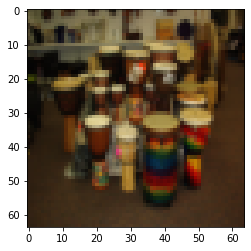

In [5]:
## plot an image in training set
index = 5
plt.imshow(train_X_orig[index])
class_name = classes[np.squeeze(train_y[:, index])].decode("utf-8")
print("y= "+ str(train_y[:, index]) + ", it is a '" + class_name + "' picture.")

In [6]:
m_train, m_test = train_X_orig.shape[0], test_X_orig.shape[0]
num_px = train_X_orig.shape[1]

Preprocessing the dataset with 2 steps:
1. Flatten X train and X test datasets using reshape function.
2. Standardize the train and test sets by dividing its maxiumum value.

In [7]:
X_train_flatten = train_X_orig.reshape(m_train, -1).T
X_test_flatten = test_X_orig.reshape(m_test, -1).T
print("X train now has shape: ", X_train_flatten.shape)
print("Y train has shape: ", train_y.shape)
print("X test now has shape: ", X_test_flatten.shape)
print("Y test has shape: ", test_y.shape)
print("There are {} training examples in the train set".format(X_train_flatten.shape[1]))
print("There are {} training examples in the test set".format(X_test_flatten.shape[1]))

X train now has shape:  (12288, 209)
Y train has shape:  (1, 209)
X test now has shape:  (12288, 50)
Y test has shape:  (1, 50)
There are 209 training examples in the train set
There are 50 training examples in the test set


Now the train and test sets have correct dimensions. We will standardize them before we apply the dnn model

In [8]:
X_train =  X_train_flatten/255.
X_test  =  X_test_flatten/255.

In [9]:
deep_learning_model = dnn()

We will first train the model with 2 layers with 5 units in the hidden layer and 1 unit in the output layer

In [10]:
# n_x = X_train.shape[0]
# layer_sizes = [n_x, 7, 1]
# params, costs = deep_learning_model.dnn_model(X_train, train_y, 2500, 0.0075, layer_sizes, print_cost = True)

In [11]:
# learning_rate = 0.075
# plt.plot(np.squeeze(costs))
# plt.ylabel('cost')
# plt.xlabel('iterations (per hundreds)')
# plt.title("Learning rate =" + str(learning_rate))
# plt.show()

In [44]:
n_x = X_train.shape[0]
layer_sizes = [12288,20, 7, 1]
params, costs = deep_learning_model.dnn_model(X_train, train_y, num_iterations= 2200, learning_rate=0.030,layer_sizes=layer_sizes, print_cost = True)

Cost at 0th iteration is: 0.6932790662681539.
Cost at 100th iteration is: 0.6553960625134253.
Cost at 200th iteration is: 0.6467293474142922.
Cost at 300th iteration is: 0.6446462314115919.
Cost at 400th iteration is: 0.6441269982418439.
Cost at 500th iteration is: 0.6439897379661838.
Cost at 600th iteration is: 0.6439445581029861.
Cost at 700th iteration is: 0.6439167203777776.
Cost at 800th iteration is: 0.6438865686679938.
Cost at 900th iteration is: 0.6438416715434329.
Cost at 1000th iteration is: 0.6437645412470369.
Cost at 1100th iteration is: 0.6436203953948879.
Cost at 1200th iteration is: 0.643324686927407.
Cost at 1300th iteration is: 0.6425908954853968.
Cost at 1400th iteration is: 0.6402841779576377.
Cost at 1500th iteration is: 0.6296825934287017.
Cost at 1600th iteration is: 0.5728032000516136.
Cost at 1700th iteration is: 0.48710410025626805.
Cost at 1800th iteration is: 0.48798462242472795.
Cost at 1900th iteration is: 0.41970829847413677.
Cost at 2000th iteration is: 0

In [45]:
y_test_prediction = deep_learning_model.predict(X_test,test_y, params)
y_train_prediction= deep_learning_model.predict(X_train,train_y, params)

Accuracy: 0.74
Accuracy: 0.6746411483253587


In [14]:
test_accuracy = np.sum(np.abs(y_test_prediction - test_y))/(test_y.shape[1])
train_accuracy = np.sum(np.abs(y_train_prediction - train_y))/(train_y.shape[1])
print("test accuracy is: {}".format(test_accuracy))
print("train accuracy is: {}".format(train_accuracy))

test accuracy is: 0.66
train accuracy is: 0.3444976076555024


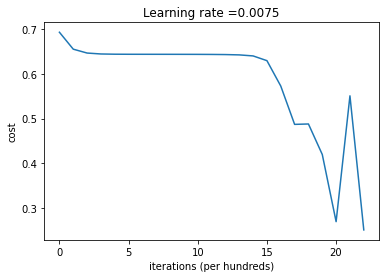

In [46]:
learning_rate = 0.0075
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()
